In [2]:
import nltk
# import all the resources for Natural Language Processing with Python
nltk.download("book")

from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
# Reading the data
path = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/Suicide_twitter_data_final.xlsx"
path1 = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/Reddit-Suicide-Data-Final.xlsx"
path2 = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/Facebook-Suicide-Data-2.xlsx"

df = pd.read_excel(path)
df1 = pd.read_excel(path1)
df2 = pd.read_excel(path2)

# frames = [df, df1, df2]

# df3 = pd.concat(frames)
# df3.shape
# df3["text"][100]
df

,text,sentiment
0,b'@SmurphySuzanne @Sunderland_GM And more coun...,1.0
1,b'RT @TatasenkoMana: This Method suicide 18 Da...,1.0
2,b'RT @ennui365: Why in the name of Vince Foste...,1.0
3,b'@Alan_G_Smith_BC @diana_murphy613 @JustinTru...,0.0
4,"b""RT @sidhant: Turkey's mega Antalya Diplomati...",0.0
...,...,...
293,b'With movies like Batman and suicide squad ho...,0.0
294,b'@CinemaExec @Kinetic_Aces @JorgeONeillYT But...,0.0
295,b'RT @nanonmv: tw suicide self harm\n\nthinkin...,1.0
296,b'RT @HannahD35612130: Remember the remainder ...,0.0


In [6]:
df1

,text,sentiment
0,Open-pit coal mining to be suicidal for Bang...,1.0
1,"Bangladesh police join forces with Meta, Tik...",0.0
2,VIDEO: Why Kashmiri students protested after...,1.0
3,least game addict boy in bangladesh. commits...,1.0
4,Bangladesh's first transgender news reader t...,1.0
...,...,...
180,I am tired of being weak and destroyed.,1.0
181,"Every religion fights a final, worldwide cru...",1.0
182,should i stop wanting to be happy?,1.0
183,I will spend the coming 207 days combing thr...,0.0


In [7]:
df1['text'][180]

'  I am tired of being weak and destroyed.'

In [8]:
df2

,text,sentiment
0,Kashmiri Medical student attempted Suicide i...,1.0
1,Chattogram Dr. Akash doctor dies by suicide...,1.0
2,"Trigger Warning: Suicide Abu Mohashin Khan,...",1.0
3,WARNING - CONFRONTING IMAGES | What really h...,0.0
4,SAY NO TO SUICIDE! As Let's Talk Mental Heal...,1.0
5,What is anxiety? Anxiety is a feeling of fea...,1.0
6,#BreakingNews Terrorist Attack On #Gurdwara...,0.0
7,"Long but wanted to share my thoughts, to who...",1.0
8,Depression is not just mental “disorder” it’...,1.0
9,To navigate your journey towards a beautiful...,0.0


In [9]:
df3 = df

for ind in df1.index:
    # print(df['Name'][ind], df['Stream'][ind])
    # print(df1['text'][ind], df1['sentiment'][ind])

    df3 = df3.append({'text': df1['text'][ind], 'sentiment': df1['sentiment'][ind]}, ignore_index=True)

for ind in df2.index:
    # print(df['Name'][ind], df['Stream'][ind])
    # print(df2['text'][ind], df2['sentiment'][ind])

    df3 = df3.append({'text': df2['text'][ind], 'sentiment': df2['sentiment'][ind]}, ignore_index=True)

df1.shape[0]
df3.shape

(529, 2)

In [10]:
df3['text'][418]

'  Words on the street that world war 3 is getting started in order to exterminate all humans : Information is power, but like all power, there are those that want to keep it for themselves'

In [11]:
def preprocess(paragraph):
    text = re.sub(r'\[[0-9]*\]',' ',paragraph)
    text = re.sub(r'\s+',' ',text)
    text = text.lower()
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [12]:
def sent_tok(paragraph):
  # sentences tokenize
  sentences = nltk.sent_tokenize(paragraph)
  # print(sentences)
  # tf_sen = sentences
  return sentences

In [13]:
df3['text'] = df3['text'].astype(str)
df3['text'][510]

'  World Suicide Prevention Day 2021 #SayNoToSuicide,'

In [14]:
df3['cleaned'] = df3['text'].apply(func = preprocess)
df3.head(4)
# display(df3)
# df3['text'][]

,text,sentiment,cleaned
0,b'@SmurphySuzanne @Sunderland_GM And more coun...,1.0,b'@smurphysuzanne @sunderland_gm and more coun...
1,b'RT @TatasenkoMana: This Method suicide 18 Da...,1.0,b'rt @tatasenkomana: this method suicide dazai...
2,b'RT @ennui365: Why in the name of Vince Foste...,1.0,"b'rt @ennui : why in the name of vince foster,..."
3,b'@Alan_G_Smith_BC @diana_murphy613 @JustinTru...,0.0,b'@alan_g_smith_bc @diana_murphy @justintrudea...


In [15]:
df3['cleaned'] = df3.cleaned.apply(func = sent_tok)
# df3['cleaned'][47]

In [16]:
df3['text'][420]

'  The Other Pandemic: Human Trafficking'

In [17]:
df3['cleaned'][442]

[' [event] mehndi\'s \\"heart of darkness\\" speech']

In [18]:
df3.shape

(529, 3)

In [19]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [20]:
import gensim.models.keyedvectors as word2vec #need to use due to depreceated model
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report

import re
import logging

In [21]:
#and use regular expression to keep only letters we will use nltk Regular expression package
tkr = RegexpTokenizer('[a-zA-Z@]+')

text_split = []
cnt = 0
for x in df3['cleaned']:
    # print(x)

    text = str(x).lower().split()
    text = tkr.tokenize(str(text))
    # text_split.append(text)

    tfidf = TfidfVectorizer(stop_words='english')

    response = tfidf.fit_transform(x)

    # print (tfidf.get_feature_names_out())
    # Define the number of topics or components
    num_components=2

    # Create SVD object
    lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

    # Fit SVD model on data
    lsa.fit_transform(response)

    # Get Singular values and Components 
    Sigma = lsa.singular_values_
    V_transpose = lsa.components_.T

    # Print the topics with their terms
    terms = tfidf.get_feature_names_out()

    # print(cnt)
    cnt += 1
    temp = []
    for index, component in enumerate(lsa.components_):
        zipped = zip(terms, component)
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:3]
        top_terms_list=list(dict(top_terms_key).keys())
        # print("Topic "+str(index)+": ",top_terms_list)
        temp = temp + top_terms_list
      
    text_split.append(text+temp)

# print(cnt)
print(text_split[1:2])

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:234: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


[['b', 'rt', '@tatasenkomana', 'this', 'method', 'suicide', 'dazai', 'explained', 'to', 'oda', 'and', 'ango', 'letting', 'everyone', 'die', 'to', 'be', 'the', 'only', 'one', 'left', 'in', 'the', 'world', 'it', 'felt', 'xe', 'x', 'xa', 'ango', 'dazai', 'die']]


In [22]:
len(text_split)

529

In [23]:
'''
Use pretrained Word2Vec model from google but trim the word list to 50,0000 compared to 300,000 in the original
Google pretrained model
'''

w2vModel = word2vec.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Pattern/Lab/Project/word2vec/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=50000)

In [24]:
#Convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_split)
X = tokenizer.texts_to_sequences(text_split)
# X[10]
# X.shape[1]
L = len(max(X, key=len))
L

182

In [25]:
#lenght of tweet to consider
maxlentweet = L
#add padding
X = pad_sequences(X, maxlen=maxlentweet)
print(X.shape)
X

(529, 182)


array([[   0,    0,    0, ...,  340, 1012,  141],
       [   0,    0,    0, ..., 1014, 1013,  464],
       [   0,    0,    0, ...,  394, 1016, 1803],
       ...,
       [   0,    0,    0, ...,    3, 1006,  193],
       [   0,    0,    0, ...,  298, 1008,  107],
       [   0,    0,    0, ...,   95,  328,  156]], dtype=int32)

In [26]:
w2vModel.syn0.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(50000, 300)

In [27]:
#create a embedding layer using Google pre triained word2vec (50000 words)
embedding_layer = Embedding(input_dim=w2vModel.syn0.shape[0], output_dim=w2vModel.syn0.shape[1], weights=[w2vModel.syn0], 
                            input_length=X.shape[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [28]:
#create model

lstm_out = 80

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(units=lstm_out))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 182, 300)          15000000  
                                                                 
 lstm (LSTM)                 (None, 80)                121920    
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 15,122,001
Trainable params: 15,122,001
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
df3['sentiment'].shape

(529,)

In [30]:
#split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, df3['sentiment'], test_size= 0.1, random_state = 24)

In [31]:
#fit model
batch_size = 32
model.fit(X_train, Y_train, epochs=6, verbose=1, batch_size=batch_size)

Epoch 1/6
15/15 [==============================] - 8s 350ms/step - loss: 0.6665 - accuracy: 0.6050
Epoch 2/6
15/15 [==============================] - 5s 344ms/step - loss: 0.4866 - accuracy: 0.8277
Epoch 3/6
15/15 [==============================] - 5s 349ms/step - loss: 0.2261 - accuracy: 0.9265
Epoch 4/6
15/15 [==============================] - 5s 343ms/step - loss: 0.1118 - accuracy: 0.9706
Epoch 5/6
15/15 [==============================] - 5s 347ms/step - loss: 0.0882 - accuracy: 0.9811
Epoch 6/6
15/15 [==============================] - 5s 346ms/step - loss: 0.0542 - accuracy: 0.9853


In [32]:
#analyze the results
score, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred = model.predict(X_test)

2/2 - 1s - loss: 0.7916 - accuracy: 0.7170 - 615ms/epoch - 308ms/step


In [33]:
# import numpy as np

# y_pred=np.zeros(10000)
# y_test=np.zeros(10000)

# indices1 = np.random.randint(0,10000,300)
# indices2 = np.random.randint(0,10000,400)
# # indices3 = np.random.randint(0,10000,500)

# y_pred[indices1] = 1
# y_test[indices2] = 1
# y_pred[indices3] = 1
# y_test[indices3] = 1


In [34]:
np.sum(Y_test)

25.0

In [35]:
np.sum(y_pred)

23.731586

In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(Y_test,y_pred.round(), normalize=False))

Accuracy Score: 38


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_pred.round(), normalize='true')

array([[0.75, 0.25],
       [0.32, 0.68]])

In [38]:
from sklearn.metrics import classification_report

classification_report(Y_test,y_pred.round())

'              precision    recall  f1-score   support\n\n         0.0       0.72      0.75      0.74        28\n         1.0       0.71      0.68      0.69        25\n\n    accuracy                           0.72        53\n   macro avg       0.72      0.72      0.72        53\nweighted avg       0.72      0.72      0.72        53\n'

In [42]:

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test,y_pred)


In [40]:
precision

array([0.71428571, 0.70588235, 0.6969697 , 0.71875   , 0.70967742,
       0.73333333, 0.72413793, 0.71428571, 0.7037037 , 0.69230769,
       0.68      , 0.70833333, 0.73913043, 0.77272727, 0.80952381,
       0.8       , 0.78947368, 0.83333333, 0.88235294, 0.875     ,
       0.86666667, 0.85714286, 0.84615385, 0.83333333, 0.81818182,
       0.8       , 0.77777778, 0.75      , 0.71428571, 0.66666667,
       0.8       , 0.75      , 0.66666667, 0.5       , 0.        ,
       1.        ])

In [41]:
recall

array([1.  , 0.96, 0.92, 0.92, 0.88, 0.88, 0.84, 0.8 , 0.76, 0.72, 0.68,
       0.68, 0.68, 0.68, 0.68, 0.64, 0.6 , 0.6 , 0.6 , 0.56, 0.52, 0.48,
       0.44, 0.4 , 0.36, 0.32, 0.28, 0.24, 0.2 , 0.16, 0.16, 0.12, 0.08,
       0.04, 0.  , 0.  ])

In [56]:
thresholds

array([0.07822457, 0.11592874, 0.14542705, 0.17193511, 0.1840061 ,
       0.20546404, 0.2378315 , 0.29725784, 0.3099038 , 0.3327759 ,
       0.46877903, 0.5461121 , 0.5803722 , 0.626858  , 0.63605535,
       0.6784488 , 0.78592575, 0.8226732 , 0.8293345 , 0.8498903 ,
       0.8720962 , 0.87894213, 0.95776165, 0.9677332 , 0.9738437 ,
       0.9779301 , 0.9810646 , 0.98212385, 0.98561   , 0.98900235,
       0.9923156 , 0.99249625, 0.99456733, 0.9953803 , 0.99632764,
       0.9975494 ], dtype=float32)

Text(0.5, 51.0, 'Predicted')

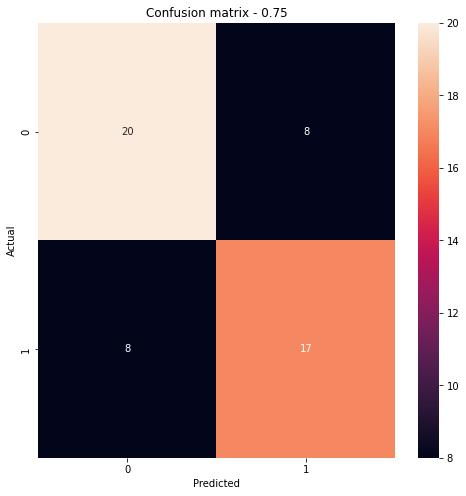

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report


threshold = 0.75

plt.figure(figsize=(8,8))

sns.heatmap(confusion_matrix(Y_test,y_pred.round()), annot = True )
plt.title('Confusion matrix - {}'.format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')

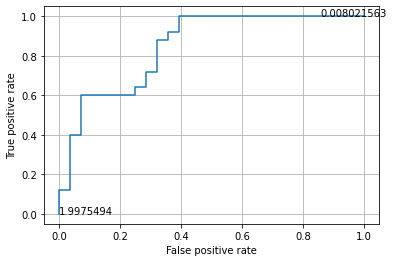

In [73]:
fp, tp, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fp, tp)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")


plt.grid()

skip = 20

for i in range(0, len(thresholds), skip):
  plt.text(fp[i], tp[i], thresholds[i])
plt.show()

In [74]:
from sklearn.metrics import auc

tpr,fpr = roc_curve(Y_test, y_pred)

# tpr = tp/(tp+fn)
# fpr = fp/(fp+tn)

auc_value = auc(fpr, tpr)
print("Area under curve=", auc_value)


ValueError: ignored